In [41]:
from google.cloud import storage

gcs_bucket = 'auven-satellite-data'
service_privatekey = 'goldbusters-data-load-privatekey.json'
storage_client = storage.Client.from_service_account_json(service_privatekey)
blobs = storage_client.list_blobs(gcs_bucket)

# list objects in bucket
for blob in blobs:
    print(blob.name)

testexportgeotiff.tif


In [59]:
import rasterio
print("rasterio's version is: " + rasterio.__version__)

rasterio's version is: 1.2.3


In [44]:
# get image from GCS
file_name = 'testexportgeotiff.tif'
blob = storage_client.bucket(gcs_bucket).get_blob(file_name)

In [7]:
img = blob.download_as_bytes()

In [46]:
blob_uri = f"gs://{gcs_bucket}/{file_name}"

In [47]:
vsigs_url = f"/vsigs/{gcs_bucket}"

In [70]:
with rasterio.Env(GOOGLE_APPLICATION_CREDENTIALS=service_privatekey):
    with rasterio.open(blob_uri) as src:
        # How many bands does this image have?
        num_bands = src.count
        print('Number of bands in image: {n}'.format(n=num_bands))
        print('Dimensions of image: {} x {} (width x height)'.format(src.width, src.height))
        
        
        # Read raster bands to Numpy array
        img = src.read(1)

Number of bands in image: 3
Dimensions of image: 2160 x 14502 (width x height)


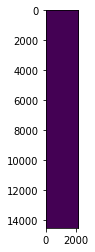

In [71]:
import matplotlib.pyplot as plt
plt.imshow(img)